In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates

#import requests
#import json
from pathlib import Path
import sys
import pickle

import time
from datetime import datetime
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint

#from IPython.display import Image
#import graphviz

%matplotlib inline

## Function to convert day number to day

In [2]:
def convert_day(num):
    if num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    elif num == 6:
        return 'Saturday'
    else:
        return 'Sunday'

## Function to convert Month number to Month

In [3]:
def convert_month(num):
    if num == 1:
        return 'January'
    elif num == 2:
        return 'February'
    elif num == 3:
        return 'March'
    elif num == 4:
        return 'April'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'June'
    elif num == 7:
        return 'July'
    elif num == 8:
        return 'August'
    elif num == 9:
        return 'September'
    elif num == 10:
        return 'October'
    elif num == 11:
        return 'November'
    else:
        return 'December'

In [4]:
#path to files
file_path_csv_weather = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\weather_info_final.csv')
file_path_csv_bike = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\bike_info_final.csv')
file_path_pickle = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\Pickle Files\\')

In [5]:
#Read files
df = pd.read_csv(file_path_csv_bike,index_col=False)
dfw = pd.read_csv(file_path_csv_weather,index_col=False)

df.shape,dfw.shape

df.describe()

df.dtypes

df.head()

df['status'].unique()

dfw.describe()

dfw.dtypes

dfw.head()

dfw['weather_main'].unique()

## Set up Time Parmeters - Bike and Weather

In [6]:
df["TIME"] = pd.to_datetime(df["creat_time"],format='%Y-%m-%d %H:%M:%S')
df["YEAR"] = df["TIME"].dt.year
df["MONTH"] = df["TIME"].dt.month
df["DAY"] = df['TIME'].dt.dayofweek
df["DAY_num"] = df["TIME"].dt.day
df["HOUR"] = df["TIME"].dt.hour
df["MINUTE"] = df["TIME"].dt.minute

df.dtypes

df['DAY'].unique()

df["TIME"].head()

In [7]:
df['TIME'] = df['TIME'].dt.round('H')

df['TIME'].head()

In [8]:
dfw["TIME"] = pd.to_datetime(dfw["creat_time"],format='%Y-%m-%d %H:%M:%S')
dfw["sunrise"] = pd.to_datetime(dfw["sunrise"],format='%Y-%m-%d %H:%M:%S')
dfw["sunset"] = pd.to_datetime(dfw["sunset"],format='%Y-%m-%d %H:%M:%S')

dfw["YEAR"] = dfw["TIME"].dt.year
col =np.array(dfw["YEAR"],np.int64) #Converts float to int
dfw["YEAR"] = col #Converts float to int

dfw["MONTH"] = dfw["TIME"].dt.month
col =np.array(dfw["MONTH"] ,np.int64)
dfw["MONTH"]  = col

dfw['DAY'] = dfw['TIME'].dt.dayofweek
col =np.array(dfw['DAY'],np.int64) 
dfw['DAY'] = col 
dfw["DAY_num"] = dfw["TIME"].dt.day
col =np.array(dfw["DAY_num"],np.int64)
dfw["DAY_num"] = col

dfw["HOUR"] = dfw["TIME"].dt.hour
col =np.array(dfw["HOUR"] ,np.int64)
dfw["HOUR"]  = col

dfw["MINUTE"] = dfw["TIME"].dt.minute
col =np.array(dfw["MINUTE"] ,np.int64)
dfw["MINUTE"] = col

In [9]:
dfw['TIME'] = dfw['TIME'].dt.round('H')
dfw['TIME'] .head()

0   2023-03-13 09:00:00
1   2023-03-28 10:00:00
2   2023-03-31 01:00:00
3   2023-03-15 06:00:00
4   2023-03-31 01:00:00
Name: TIME, dtype: datetime64[ns]

In [10]:
df.loc[df['DAY'] == 0, 'DAY_name'] = 'Mon'  
df.loc[df['DAY'] == 1, 'DAY_name'] = 'Tue'  
df.loc[df['DAY'] == 2, 'DAY_name'] = 'Wed'  
df.loc[df['DAY'] == 3, 'DAY_name'] = 'Thu'  
df.loc[df['DAY'] == 4, 'DAY_name'] = 'Fri' 
df.loc[df['DAY'] == 5, 'DAY_name'] = 'Sat' 
df.loc[df['DAY'] == 6, 'DAY_name'] = 'Sun' 
df["DAY_name"].unique()

array(['Wed', 'Thu', 'Sat', 'Sun', 'Tue', 'Mon', 'Fri'], dtype=object)

In [11]:
dfw.loc[df['DAY'] == 0, 'DAY_name'] = 'Mon'  
dfw.loc[df['DAY'] == 1, 'DAY_name'] = 'Tue'  
dfw.loc[df['DAY'] == 2, 'DAY_name'] = 'Wed'  
dfw.loc[df['DAY'] == 3, 'DAY_name'] = 'Thu'  
dfw.loc[df['DAY'] == 4, 'DAY_name'] = 'Fri' 
dfw.loc[df['DAY'] == 5, 'DAY_name'] = 'Sat' 
dfw.loc[df['DAY'] == 6, 'DAY_name'] = 'Sun' 
dfw["DAY_name"].unique()

array(['Wed', 'Thu', 'Sat', 'Sun', 'Tue', 'Mon', 'Fri'], dtype=object)

## Create New Bike parameters 

In [12]:
df['utilisation'] = df['bike_stand_available'] / df['bike_stand']
#df['utilisation'].head()

## Set Up 3 lists to hold the R2 values of Training and Test Random Forest Models + StationID

In [48]:
randommodel_mser_train_list = []
randommodel_mser_test_list = []
randommodel_stationid = []


## Convert Temperature to Celcius

In [83]:
#Convert from Kelvin to Celcius
dfw["tempcel"] = dfw["temp"]-273.15
dfw["tempcel_feel"] = dfw["temp_feel"]-273.15


dfw["wind_speed"].unique()
dfw["weather_main"].unique()

dfw['temp_check'] = (dfw['tempcel']==0)
dfw["tempcel"].loc[dfw['temp_check']]

## Create new column putting numerical values to weather_main

In [84]:
dfw['weather_main'].replace(['Clouds', 'Rain','Snow','Clear','Drizzle','Mist','Fog'],[2, 4,5,1,3,6,7], inplace=True)
dfw["weather_main"].unique()

array([2, 4, 3, 5, 1, 6, 7], dtype=int64)

## Create Weather Plots 

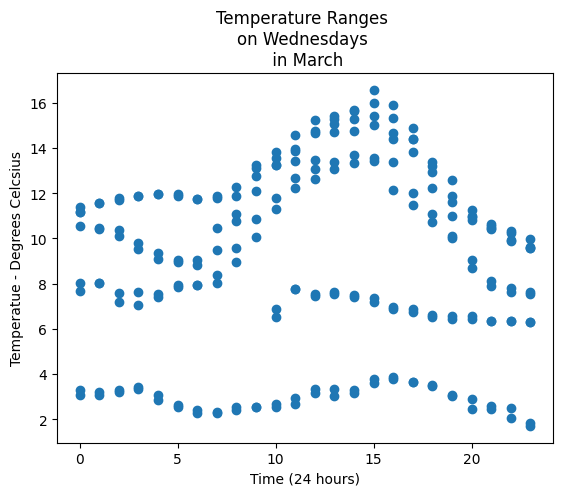

In [85]:
#Set X and Y plot

dfw['time_select'] = (dfw['DAY']==day_num-1) & (dfw['MONTH']==month_num) #& (dfw["HOUR_w"] == hour_num)
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["tempcel"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Temperature Ranges \non {convert_day(day_num-1)}s \n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Temperatue - Degrees Celcsius")
#ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
#xtick = np.array([0,4,8,12,16,20,24])
#plt.xticks(xtick)
#plt.yticks(ytick)
plt.scatter(x,y)
plt.show()

y.unique()

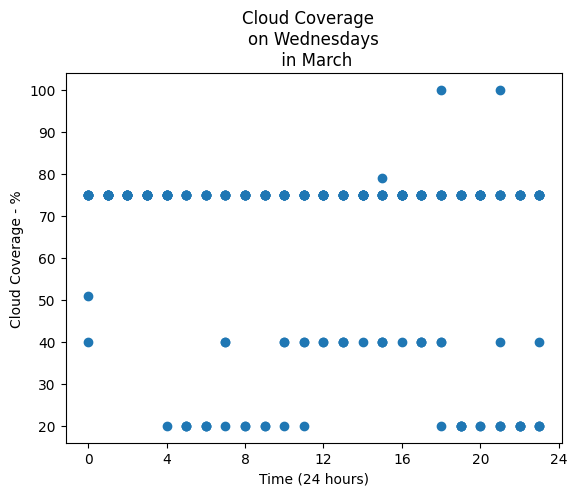

In [86]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["clouds"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Cloud Coverage  \non {convert_day(day_num-1)}s\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Cloud Coverage - %")
ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
#plt.xlim(0,24)
plt.scatter(x,y)
plt.show()

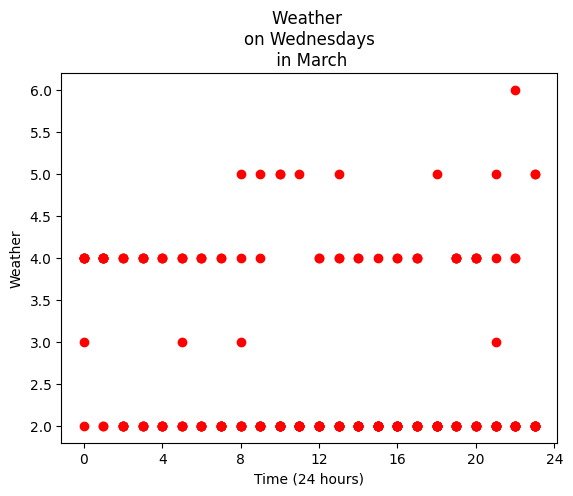

In [87]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["weather_main"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Weather \non {convert_day(day_num-1)}s\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Weather")
#ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
#plt.xlim(0,24)
plt.scatter(x,y,color='red')
plt.show()

## Set up Search Parameters for Bike (Station ID, Month, Day, Hour, Bike Avail., Bike Park.) 

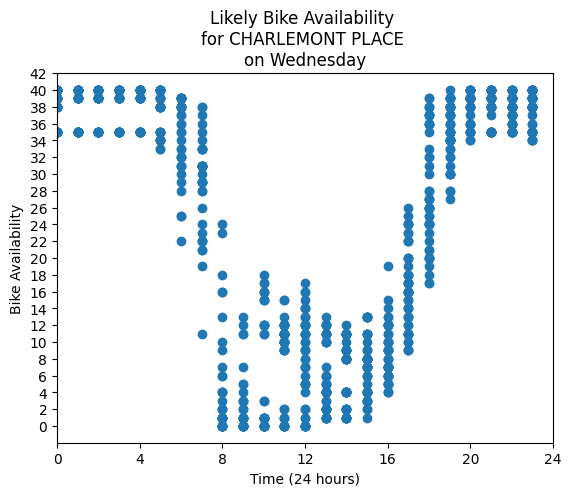

In [185]:
#Check Bike availability or Bike Parking Availability
req = 'b' #input("Do you want to check for Bike Availability (Type: b) or Parking Availability (Type: p): ")
if req == 'b' or req == 'B' or req == 'p' or req == 'P' or req == 'bike' or req == 'Bike' or req == 'park' or req == 'Park':

    #Month
    month_num = 3

    #Day of the week
    day_num = 4 #int(input("Enter Day Number (1 = Mon, 2 = Tues, 3 = Wed etc): "))
    
    #Hour
    hour_num = 12
    
    #Minute pass the hour
    #min_num = int(input("Enter Minute pass the hour (0 - 15 - 30 - 45): "))
    
    #Station ID
    stationid = 5 #int(input("Enter Station ID (1 to 117): "))

    try:
        stationname = df.loc[(df['number']==stationid),'name'].values[0]
        
        #Filter data based on certain input parameters
        df['station_select'] = (df['YEAR']==2023) & (df['MONTH']==month_num) & (df['DAY']==day_num-1) & (df['number']==stationid)
        
        ## Set up x- and y-axis of Plot
        x =df['HOUR'].loc[df['station_select']]

        if req == 'bike' or req == 'Bike' or req == 'b' or req == 'B':
            y = df['bike_available'].loc[df['station_select']]
            plt.ylabel("Bike Availability")
            plt.title(f'Likely Bike Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            
        elif req == 'park' or req == 'Park' or req == 'p' or req == 'P':
            y = df['bike_stand_available'].loc[df['station_select']]
            plt.ylabel("Bike Parking Availability")
            plt.title(f'Likely Bike Parking Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            print("OK")
       
        #Set Up Plot
        plt.xlabel("Time (24 hours)")
        ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
        xtick = np.array([0,4,8,12,16,20,24])
        plt.xticks(xtick)
        plt.yticks(ytick)
        plt.xlim(0,24)
        plt.scatter(x,y)
        plt.show()
    except:
        print ("Station ID Does not exist")
    
else:
    print("Incorrect Entry")

## Combine the two dataframes - Bike & Weather

In [186]:
df.shape,dfw.shape

((821117, 21), (1678, 24))

In [187]:
dfbikeweath = pd.merge(df, dfw, on='TIME', how='inner')

#dfbikeweath = df.merge(dfw, on="TIME")
dfbikeweath.shape

(1640866, 44)

dfw["TIME"].isin(df["TIME"]).value_counts()

dfbikeweath.columns

list(dfbikeweath.columns[:7]) + ['weather_main','tempcel']

dfbikeweath.head(10)[list(dfbikeweath.columns[:7]) + ['weather_main','tempcel']]

dfbikeweath.describe().T

dfbikeweath.head()

## Check if any missing values (NaN)

In [188]:
dfbikeweath.isna().sum().sum()

0

## Drop some of the unwanted columns 

In [189]:
dfbikeweath.drop(labels=['delete_flag_y','id_x','delete_flag_x','address','status','last_update','coord_lon','coord_lat'],axis=1,inplace=True)

dfbikeweath.dtypes

## Split Data set to Train and Test sets

In [190]:
train_set,test_set = train_test_split(dfbikeweath,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((1312692, 36), (328174, 36))

## Carry out some preliminary analysis on Correlations

bikes = train_set.copy()
#bikes.dtypes

In [191]:
corr_matrix = train_set.corr()

C:\Users\corma\AppData\Local\Temp\ipykernel_264\4023298406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


In [192]:
corr_matrix['bike_available'].sort_values(ascending = False)

bike_available          1.000000
bike_stand              0.223730
station_select          0.044832
number                  0.023497
DAY_x                   0.014485
DAY_y                   0.014463
clouds                  0.005051
weather_main            0.004309
MINUTE_x               -0.000481
MINUTE_y               -0.000920
DAY_num_x              -0.001456
DAY_num_y              -0.001460
weather_id             -0.001986
wind_speed             -0.003546
time_select            -0.008174
tempcel_feel           -0.011270
temp_feel              -0.011270
tempcel                -0.011574
temp                   -0.011574
HOUR_y                 -0.011818
HOUR_x                 -0.011892
bike_stand_available   -0.694750
utilisation            -0.866011
YEAR_x                       NaN
MONTH_x                      NaN
YEAR_y                       NaN
MONTH_y                      NaN
Name: bike_available, dtype: float64

## Correlation based on weather

In [193]:
train_set[['bike_available','weather_main','clouds','wind_speed','weather_id','tempcel_feel','tempcel']].corr()

,bike_available,weather_main,clouds,wind_speed,weather_id,tempcel_feel,tempcel
bike_available,1.000000,0.004309,0.005051,-0.003546,-0.001986,-0.011270,-0.011574
weather_main,0.004309,1.000000,0.307769,0.148817,-0.780445,-0.089756,-0.060996
clouds,0.005051,0.307769,1.000000,0.095396,-0.239394,0.181944,0.204834
wind_speed,-0.003546,0.148817,0.095396,1.000000,-0.144138,0.250494,0.411942
weather_id,-0.001986,-0.780445,-0.239394,-0.144138,1.000000,0.046037,0.028552
tempcel_feel,-0.011270,-0.089756,0.181944,0.250494,0.046037,1.000000,0.971809
tempcel,-0.011574,-0.060996,0.204834,0.411942,0.028552,0.971809,1.000000


fig, axs = plt.subplots(2, 3, sharey=True)
bikes.plot(kind='scatter', x='weather_main', y='bike_available', label="%.3f" % bikes[['weather_main', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][0], figsize=(10, 5))
bikes.plot(kind='scatter', x='clouds', y='bike_available', label="%.3f" % bikes[['clouds', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][1])
bikes.plot(kind='scatter', x='wind_speed', y='bike_available', label="%.3f" % bikes[['wind_speed', 'bike_available']].corr().to_numpy()[0,1], ax=axs[0][2])
bikes.plot(kind='scatter', x='weather_id', y='bike_available', label="%.3f" % bikes[['weather_id', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][0])
bikes.plot(kind='scatter', x='temp_feel', y='bike_available', label="%.3f" % bikes[['temp_feel', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][1])
bikes.plot(kind='scatter', x='temp', y='bike_available', label="%.3f" % bikes[['temp', 'bike_available']].corr().to_numpy()[0,1], ax=axs[1][2])

## Correlation based on time

In [194]:
train_set[['bike_available','HOUR_x','DAY_num_x','MINUTE_x','DAY_x']].corr()

,bike_available,HOUR_x,DAY_num_x,MINUTE_x,DAY_x
bike_available,1.000000,-0.011892,-0.001456,-0.000481,0.014485
HOUR_x,-0.011892,1.000000,-0.059778,-0.003214,0.025881
DAY_num_x,-0.001456,-0.059778,1.000000,-0.000840,0.011365
MINUTE_x,-0.000481,-0.003214,-0.000840,1.000000,0.003355
DAY_x,0.014485,0.025881,0.011365,0.003355,1.000000


## Correlation based on bike

In [195]:
#NOTE: Utilisation is 'bike_available' / 'bike_stand'
train_set[['bike_available','bike_stand_available','bike_stand','utilisation']].corr()

,bike_available,bike_stand_available,bike_stand,utilisation
bike_available,1.000000,-0.694750,0.223730,-0.866011
bike_stand_available,-0.694750,1.000000,0.515434,0.895084
bike_stand,0.223730,0.515434,1.000000,0.146033
utilisation,-0.866011,0.895084,0.146033,1.000000


## Create Model of Bike Availability by StationID (Y Axis) 

In [196]:
y = train_set['bike_available'].loc[train_set['station_select']]
y.shape

(1645,)

## Prepare Features 

In [197]:
weather_features = ['weather_main','clouds','tempcel', 'weather_id', 'wind_speed','tempcel_feel']
bike_features = ['bike_stand']
time_features = ['HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']
all_features = ['weather_main','clouds','tempcel', 'weather_id', 'wind_speed','tempcel_feel','bike_stand','HOUR_x','DAY_num_x','MINUTE_x','Day_of_Week_x']

features = weather_features

## Prepare Linear Regression inputs - choose single feature (X Axis)

In [198]:
feature = ['tempcel_feel']

X = train_set[feature].loc[train_set['station_select']]

linreg = LinearRegression()
linreg.fit(X, y)
          
# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg.intercept_)
print("Features: \n", feature)
print("Coeficients: \n", linreg.coef_)


Intercept: 
 26.925498424667076
Features: 
 ['tempcel_feel']
Coeficients: 
 [-0.58313412]


## Actual vs Predicted - Linear Regression

In [199]:
# Predicted scores 
linreg_predictions = linreg.predict(X).round(0)
print(f"\nPrediction based on: ({feature}, Bike Availability, Predicted Bike Availability): {int(X.values[0])} , {y.values[0]} , {int(linreg_predictions[0])}")
actual_vs_predicted = pd.concat([y,pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted


Prediction based on: (['tempcel_feel'], Bike Availability, Predicted Bike Availability): 12 , 7 , 20

For CHARLEMONT PLACE: ---


,bike_available,Predicted
293384,7,20.0
407947,39,25.0
1401083,37,21.0
1362929,39,28.0
323679,1,19.0
...,...,...
1407753,0,19.0
1400283,35,21.0
1142077,36,21.0
1068632,17,28.0


## Actual Bike Availability - Value | Frequency
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
#print(frequencies)

## Plot Results - Linear Regression 

plt.title(f'Predicted Bike Availability for {stationname}\n Using Linear Regression \nBased on {feature}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(linreg_predictions, y)

## Model based on Multiple Regression - multiple features 

In [200]:
y = train_set['bike_available'].loc[train_set['station_select']]
X = train_set[features].loc[train_set['station_select']]

linreg_m = LinearRegression()
linreg_m.fit(X[features], y)

# Print the estimated linear regression coefficients.
print("\nIntercept: \n", linreg_m.intercept_)
print("Features: \n", features)
print("Coeficients: \n", linreg_m.coef_)


Intercept: 
 80.93684430727777
Features: 
 ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel']
Coeficients: 
 [-3.52529028 -0.111138   -2.45725164 -0.03210153 -0.35562149  0.92402789]


## Actual vs Predicted- Multiple Regression

In [201]:
# Predicted scores
linreg_m_predictions = linreg_m.predict(X).round(0)

actual_vs_predicted_m = pd.concat([y, pd.DataFrame(linreg_m_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_m


For CHARLEMONT PLACE: ---


,bike_available,Predicted
293384,7,18.0
407947,39,27.0
1401083,37,24.0
1362929,39,32.0
323679,1,16.0
...,...,...
1407753,0,15.0
1400283,35,24.0
1142077,36,26.0
1068632,17,27.0


## Predicted Bike Availability - Value | Frequency
(unique, counts) = np.unique(linreg_m_predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
#print(frequencies)

## Plot Results - Multiple Regression

plt.title(f'Predicted Bike Availability for {stationname}\n Using Multiple Regression \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(linreg_m_predictions, y)

## Lasso Regression 

In [202]:
y = train_set['bike_available'].loc[train_set['station_select']]
X = train_set[features].loc[train_set['station_select']]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [203]:
lassoreg = Lasso(alpha=1)
lassoreg.fit(X, y)

# Print the estimated lasso regression coefficients.
print("\nIntercept: \n", lassoreg.intercept_)
print("Features: \n", features)
print("Coeficients: \n", lassoreg.coef_)


Intercept: 
 23.934346504559272
Features: 
 ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel']
Coeficients: 
 [ 0.         -0.84378588 -2.86161649 -0.24313028 -0.41260508 -0.        ]


In [204]:
lassoreg_predictions = lassoreg.predict(X).round(0)

actual_vs_predicted_lasso = pd.concat([y, pd.DataFrame(lassoreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_lasso


For CHARLEMONT PLACE: ---


,bike_available,Predicted
293384,7,20.0
407947,39,26.0
1401083,37,23.0
1362929,39,28.0
323679,1,20.0
...,...,...
1407753,0,19.0
1400283,35,23.0
1142077,36,24.0
1068632,17,26.0


## Plot Results - Lasso Regression 

plt.title(f'Predicted Bike Availability for {stationname}\n Using Lasso Regression \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(lassoreg_predictions, y)

## Model based on Decision Tree Regressor 

In [205]:
y = train_set['bike_available'].loc[train_set['station_select']]
X = train_set[features].loc[train_set['station_select']]

#print(len(y))
treereg = DecisionTreeRegressor()
treereg.fit(X, y)

DecisionTreeRegressor()

In [206]:
# Predicted scores for each example. 
treereg_predictions = treereg.predict(X).round(0)

actual_vs_predicted_tree = pd.concat([y, pd.DataFrame(treereg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_tree


For CHARLEMONT PLACE: ---


,bike_available,Predicted
293384,7,7.0
407947,39,39.0
1401083,37,35.0
1362929,39,39.0
323679,1,1.0
...,...,...
1407753,0,1.0
1400283,35,35.0
1142077,36,38.0
1068632,17,17.0


## Predicted Bike Availability - Value | Frequency
(unique, counts) = np.unique(treereg_predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T
#print(frequencies)

## Plot Results - Decision Tree Regressor 

plt.title(f'Predicted Bike Availability for {stationname}\n Using Decision Tree Regressor \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(treereg_predictions, y)

## Random Forest Model 

In [207]:
y = train_set['bike_available'].loc[train_set['station_select']]
X = train_set[features].loc[train_set['station_select']]

randomforest = RandomForestRegressor()
randomforest.fit(X, y)

randomforest_predictions = randomforest.predict(X).round(0)

actual_vs_predicted_randomforest = pd.concat([y,pd.DataFrame(randomforest_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_randomforest


For CHARLEMONT PLACE: ---


,bike_available,Predicted
293384,7,7.0
407947,39,39.0
1401083,37,35.0
1362929,39,39.0
323679,1,1.0
...,...,...
1407753,0,1.0
1400283,35,35.0
1142077,36,38.0
1068632,17,17.0


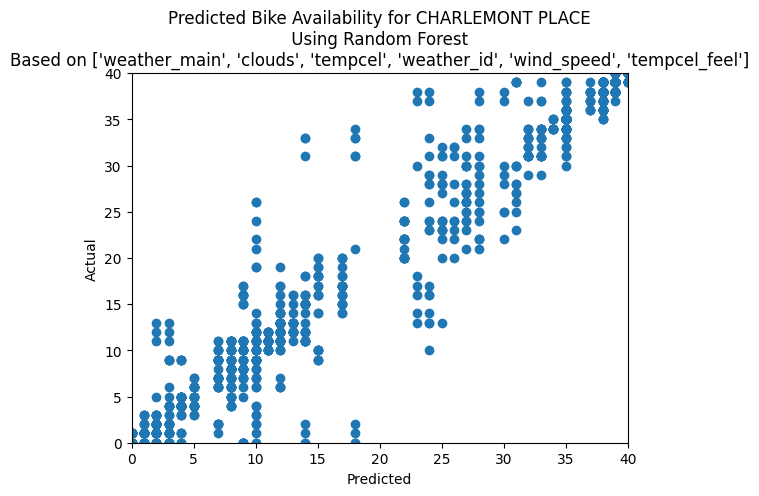

In [208]:
plt.title(f'Predicted Bike Availability for {stationname}\n Using Random Forest \nBased on {features}')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0,40)
plt.ylim(0,40)
plt.scatter(randomforest_predictions, y)

## Calculate R2 on Training Data Set - Different Models

In [209]:
print(f"\nR2 Calculations for different prediction models for {stationname}")
print("-------------------------------------------------------------------------")

linreg_mse = mean_squared_error(y,linreg_predictions)
linreg_mser = np.sqrt(linreg_mse).round(2)
print(f'Feature is {feature} \n R2 of Linear Regression Model (for Training Data Set) = {linreg_mser} \n')

linreg_m_mse = mean_squared_error(y,linreg_m_predictions)
linreg_m_mser = np.sqrt(linreg_m_mse).round(2)
print(f'Features are {features} \n R2 of Multiple Regression Model (for Training Data Set) = {linreg_m_mser}\n')

treereg_mse = mean_squared_error(y,treereg_predictions)
treereg_mser = np.sqrt(treereg_mse).round(2)
print(f'Features are {features} \n R2 of Decision Regressor Model (for Training Data Set) = {treereg_mser}\n')

randomforest_mse = mean_squared_error(y,randomforest_predictions)
randomforest_mser = np.sqrt(randomforest_mse).round(2)
print(f'Feature is {features} \n R2 of Random Tree Regression Model (for Training Data Set) = {randomforest_mser} \n')

lassoreg_mse = mean_squared_error(y,lassoreg_predictions)
lassoreg_mser = np.sqrt(lassoreg_mse).round(2)
print(f'Features are {features} \n R2 of Lasso Regression Model (for Training Data Set) = {lassoreg_mser}\n')


R2 Calculations for different prediction models for CHARLEMONT PLACE
-------------------------------------------------------------------------
Feature is ['tempcel_feel'] 
 R2 of Linear Regression Model (for Training Data Set) = 14.62 

Features are ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel'] 
 R2 of Multiple Regression Model (for Training Data Set) = 14.16

Features are ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel'] 
 R2 of Decision Regressor Model (for Training Data Set) = 2.95

Feature is ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel'] 
 R2 of Random Tree Regression Model (for Training Data Set) = 2.95 

Features are ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel'] 
 R2 of Lasso Regression Model (for Training Data Set) = 14.48



## Test the Models on the Test Data Set 

In [210]:
y_test = test_set['bike_available'].loc[test_set['station_select']]
X_test = test_set[features].loc[test_set['station_select']]

randomforest_predictions_test = randomforest.predict(X_test).round(0)

actual_vs_predicted_randomforest_test = pd.concat([y_test,pd.DataFrame(randomforest_predictions_test, columns=['Predicted'], index=y_test.index)], axis=1)
print(f"\nFor {stationname}: ---")
actual_vs_predicted_randomforest_test


For CHARLEMONT PLACE: ---


,bike_available,Predicted
1556749,6,8.0
371395,39,38.0
293385,7,7.0
1001956,6,12.0
1520219,0,0.0
...,...,...
1233030,40,40.0
1001957,6,12.0
1178871,35,35.0
787730,0,0.0


In [211]:
randomforest_mse_test = mean_squared_error(y_test,randomforest_predictions_test)
randomforest_mser_test = np.sqrt(randomforest_mse_test).round(2)
print(f'Feature is {features} \nR2 of Random Tree Regression Model (for Test Data Set) = {randomforest_mser_test} \n')
print(f'versus:--- \nR2 of Random Tree Regression Model (for Training Data Set) = {randomforest_mser} \n')

randommodel_mser_test_list.append(randomforest_mser_test)
randommodel_mser_train_list.append(randomforest_mser)
randommodel_stationid.append(stationid)

Feature is ['weather_main', 'clouds', 'tempcel', 'weather_id', 'wind_speed', 'tempcel_feel'] 
R2 of Random Tree Regression Model (for Test Data Set) = 3.19 

versus:--- 
R2 of Random Tree Regression Model (for Training Data Set) = 2.95 



In [212]:
for i in range(len(randommodel_stationid)):
    print(f'For station: {randommodel_stationid[i]} | R2 (Training) = {randommodel_mser_train_list[i]} -- R2 (Test) = {randommodel_mser_test_list[i]}')


For station: 3 | R2 (Training) = 1.51 -- R2 (Test) = 1.77
For station: 4 | R2 (Training) = 1.22 -- R2 (Test) = 1.15
For station: 5 | R2 (Training) = 1.03 -- R2 (Test) = 1.09


## Write the model to a pickle file 

In [213]:
# Serialize model object (in this case Random Forest) into a file on disk using pickle
filename = f'{file_path_pickle}\\randomforest{stationid}.pkl'
print(filename)
with open(filename, 'wb') as handle:
    pickle.dump(randomforest, handle, pickle.HIGHEST_PROTOCOL)

C:\Users\corma\Documents\GitHub\Dublin-Bikes-Helper\MachineLearn_DBH\Pickle Files\randomforest5.pkl
